In [1]:
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from tqdm import trange
from dataclasses import dataclass
import csv
import ipywidgets

In [2]:
from module import *

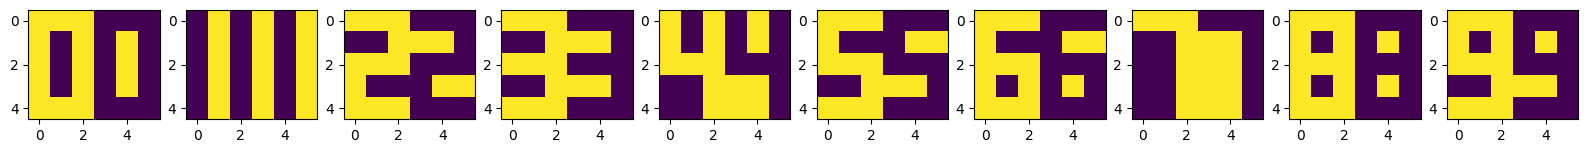

In [3]:
data_rows = {
    "e":  {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1},
    "r":  {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0},
    "c":  {0: 0, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1},
    "cr": {0: 0, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0},
    "l":  {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1},
    "lr": {0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0},
    "lc": {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1},
    "f":  {0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0},
    "off":{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
}
numbers = {
    0: "f lr lr lr f",
    1: "c c c c c",
    2: "f r f l f",
    3: "f r f r f",
    4: "lr lr f r r",
    5: "f l f r f",
    6: "f l f lr f",
    7: "f r r r r",
    8: "f lr f lr f",
    9: "f lr f r f",
}
empty = np.array([[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1],[0,0,0,1,1,1]])

numbers_rows = {k: [data_rows[vv] for vv in v.split(" ")] for k, v in numbers.items()}

fig, axs = plt.subplots(1, 10, figsize=(20,20))
for ax, n in zip(axs, numbers_rows.values()):
    ax.imshow(pd.DataFrame(n).values)

In [4]:
net = SpikeNetworkSim(inputs_l=6, dt=1)
dendrites = [
    {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 255, 1: 255},
            1: {0: 0, 1: 0},
            2: {0: 255, 1: 255},
            3: {0: 0, 1: 0},
            4: {0: 255, 1: 255},
            5: {0: 0, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 255, 1: 0},
            1: {0: 255, 1: 0},
            2: {0: 255, 1: 255},
            3: {0: 0, 1: 255},
            4: {0: 0, 1: 255},
            5: {0: 0, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 255, 1: 255},
            1: {0: 255, 1: 0},
            2: {0: 255, 1: 0},
            3: {0: 0, 1: 0},
            4: {0: 0, 1: 255},
            5: {0: 0, 1: 255},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 0, 1: 0},
            1: {0: 255, 1: 255},
            2: {0: 0, 1: 0},
            3: {0: 0, 1: 0},
            4: {0: 255, 1: 255},
            5: {0: 0, 1: 0},
        }
    }, {
        "connections":{
            0: [0, 1],
            1: [0, 1],
            2: [0, 1],
            3: [0, 1],
            4: [0, 1],
            5: [0, 1],
        }, "weights": {
            0: {0: 0, 1: 0},
            1: {0: 0, 1: 0},
            2: {0: 255, 1: 255},
            3: {0: 255, 1: 255},
            4: {0: 255, 1: 255},
            5: {0: 0, 1: 0},
        }
    },
]
lb = ["lr/lr","f/r","f/l","c/c","r/r"]
params_dendrites = {
    "tau_leak": 3, 
    "tau_inhibitory": 10,
    "tau_refractory": 4,
    "tau_ltp": 2, 
    "thres": 1400,
    "ainc": 30, 
    "adec": -15, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}

In [5]:
test_seq_data = []
test_seq_labels = []
for n in range(50):
        a = np.random.randint(10)
        test_seq_labels+=[a for _ in range(50)]
        test_seq_data+=[x for x in numbers_rows[a]]
        for i in range(5):
            test_seq_labels.append(-1)
            test_seq_data.append(data_rows["off"])

In [6]:
net.new_dendritic_layer([d["connections"] for d in dendrites], [d["weights"] for d in dendrites], lb, **params_dendrites)
out = net.feed_raw(test_seq_data)

In [7]:
from ipywidgets import SelectMultiple
SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

In [8]:
params_first_row = {
    "tau_leak": 1, 
    "tau_inhibitory": 10,
    "tau_refractory": 10,
    "tau_ltp": 1, 
    "thres": 750,
    "ainc": 30, 
    "adec": -15, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
params_second_row = {
    "tau_leak": 1, 
    "tau_inhibitory": 10,
    "tau_refractory": 20,
    "tau_ltp": 1, 
    "thres": 1000,
    "ainc": 30, 
    "adec": -30, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
params_third_row = {
    "tau_leak": 1, 
    "tau_inhibitory": 10,
    "tau_refractory": 30,
    "tau_ltp": 1, 
    "thres": 1000,
    "ainc": 30, 
    "adec": -30, 
    "wmax": 255, 
    "wmin": 1,
    "learning": False
}
weights_rows = np.array([
    [1, 1, 1, 255, 255, 255],
    [1, 1, 255, 255, 255, 1],
    [1, 255, 1, 255, 1, 255],
    [1, 255, 255, 255, 1, 1],
    [255, 1, 1, 1, 255, 255],
    [255, 1, 255, 1, 255, 1],
    [255, 255, 1, 1, 1, 255],
    [255, 255, 255, 1, 1, 1]
])
labels_rows = [
    "e",
    "r",
    "c",
    "cr",
    "l",
    "lr",
    "lc",
    "f"
]

In [9]:
weights = np.zeros((10,8))
errors = np.ones(10)
iteration = 0
test_seq_data = []
test_seq_labels = []
for n in range(50):
        a = np.random.randint(10)
        test_seq_labels+=[a for _ in range(50)]
        test_seq_data+=[x for x in numbers_rows[a] for _ in range(10)]
        #data += [in numbers_rows[n] for _ in range(10)]
        for i in range(50):
            test_seq_labels.append(-1)
            test_seq_data.append(data_rows["off"])
net = SpikeNetworkSim(inputs_l=6, dt=1)
net.new_layer(8, weights=weights_rows, labels=labels_rows, **params_first_row)
inputs = net.nodes.join(net.layers).query("type == 'postsynaptic' and layer == -1").index
net.new_layer(8, weights=weights_rows, labels=labels_rows, passed_inputs=inputs, **params_second_row)
net.new_layer(8, weights=weights_rows, labels=labels_rows, passed_inputs=inputs, **params_third_row)
net.feed_raw(test_seq_data)
net.weights

ValueError: operands could not be broadcast together with shapes (8,) (6,) 

In [ ]:
%debug

In [ ]:
net.nodes[59]

In [ ]:

            
while any(errors>0.5):
    print(iteration)
    net = SpikeNetworkSim(inputs_l=6, dt=1)
    net.new_layer(8, weights=weights_rows, labels=labels_rows, **params_rows)
    net.new_layer(40, weights=weights, **params_digits)
    digits_post = net.nodes.join(net.layers).query("type == 'postsynaptic' and layer == layer.max()").index
    data = []
    ans = []
    ns = [0, 1, 2]
    for n in range(50):
        a = np.random.randint(10)
        ans+=[a for _ in range(50)]
        data+=[x for x in numbers_rows[a] for _ in range(10)]
        #data += [in numbers_rows[n] for _ in range(10)]
        for i in range(150):
            ans.append(-1)
            data.append(data_rows["off"])
    net.feed_raw(data, "output.csv")
    
    net.layer_params["learning"][-1] = False
    net.layer_params["tau_refractory"][-1] = 50
    net.layer_params["tau_inhibitory"][-1] = 50
    
    net.feed_raw(test_seq_data)
    r = net.error(test_seq_labels, pos_weight=50, neg_weight=50)[digits_post]
    r = pd.DataFrame((r.min(), r.idxmin()), index=["min", "tag"]).transpose()

    for i in range(10):
        if i in r.tag.values.astype(int):
            ind = r.query("tag==@i").query("min==min.min()").index[0]
            if r.at[ind, "min"] <= errors[i]:
                weights[i] = net.weights.at[ind-1, "weights"]
                errors[i] = r.at[ind, "min"]
            else:
                errors[i] = r.iat[i, 0]
            
    print(errors)
    print(weights)
    iteration+=1


In [ ]:
%debug

In [ ]:
dendrite = {1: (1,2,3), 2: 1}
[d if isinstance(d, int) else [_d for _d in d] for s,d in dendrite]